<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-5418-Analytics-Tool-For-Ecommerce-businesses/blob/main/Analytics_Tool_For_Ecommerce_Businesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
df=df.drop('Country', axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
df['Sub-Category'].nunique()

17

In [ ]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

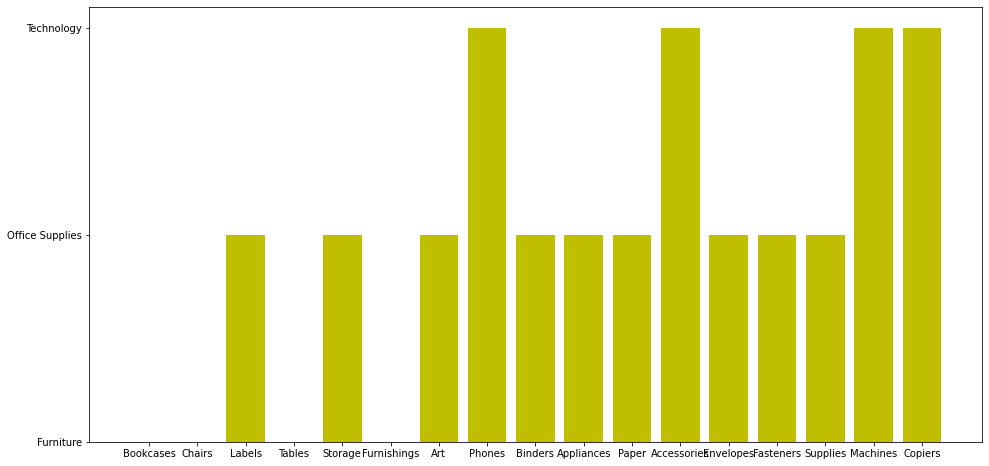

In [ ]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

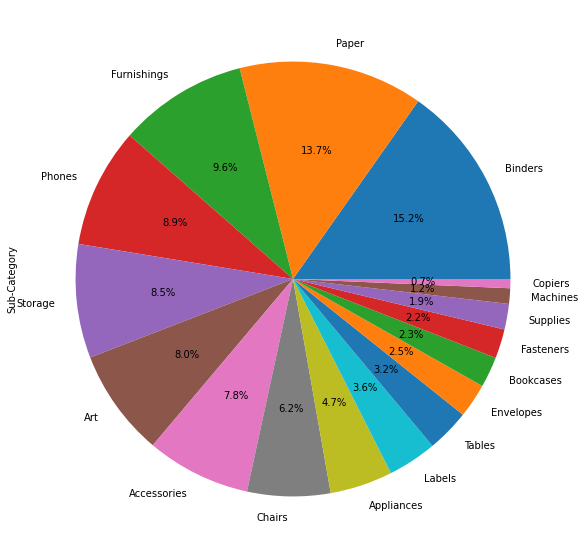

In [ ]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

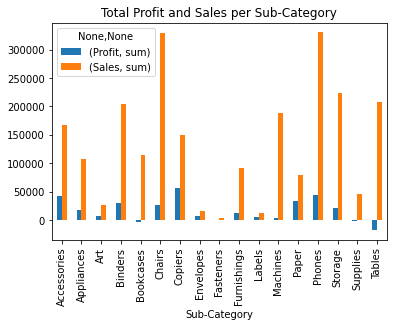

In [ ]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [ ]:
df['Product Name'].nunique()

1850

In [ ]:
df['Product Name'].value_counts()

Staple envelope                                             48
Staples                                                     46
Easy-staple paper                                           46
Avery Non-Stick Binders                                     20
Staples in misc. colors                                     19
                                                            ..
4009 Highlighters                                            1
Xerox 1922                                                   1
Linden 12" Wall Clock With Oak Frame                         1
Fellowes Smart Surge Ten-Outlet Protector, Platinum          1
Stride Job 150 Highlighters, Chisel Tip, Assorted Colors     1
Name: Product Name, Length: 1850, dtype: int64

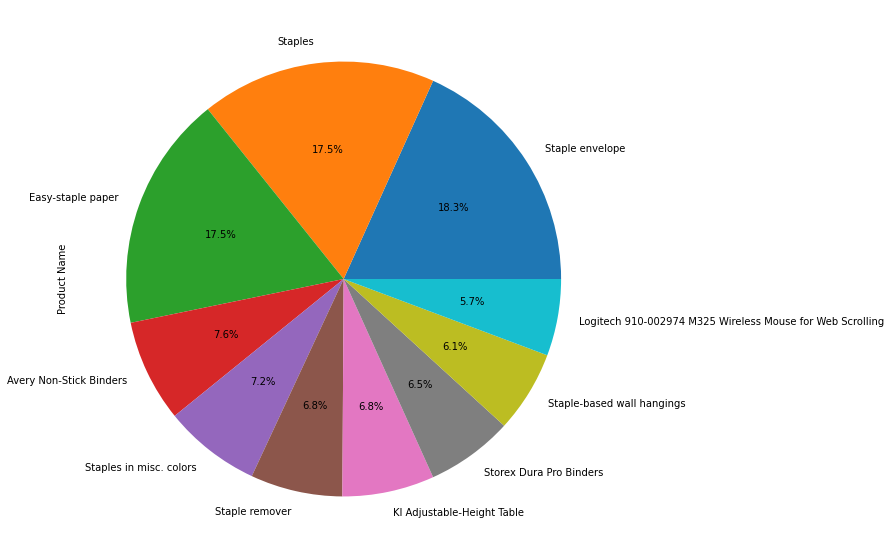

In [ ]:
plt.figure(figsize=(12,10))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

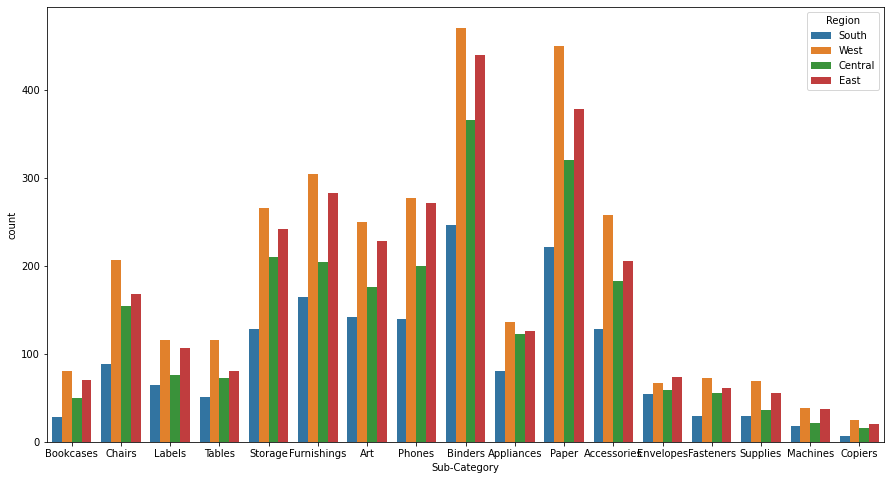

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category",hue="Region",data=df)
plt.show()

In [ ]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [ ]:
df['Profit %']=(df['Profit']/df['Cost'])*100


In [ ]:
df.iloc[[0,1,2,3,4],[14,20]]

,Product Name,Profit %
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


In [ ]:
df.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,East,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,52.4900,100.000000
4611,CA-2016-109407,2016-01-24,2016-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,Gulfport,Mississippi,39503,South,OFF-BI-10000285,Office Supplies,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.360,4,0.0,15.6800,15.6800,100.000000
3984,CA-2016-135265,2016-07-07,2016-07-09,Second Class,CC-12370,Christopher Conant,Consumer,Los Angeles,California,90045,West,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,48.940,1,0.0,24.4700,24.4700,100.000000
4651,CA-2017-150987,2017-04-08,2017-04-12,Standard Class,AH-10120,Adrian Hane,Home Office,San Francisco,California,94110,West,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,195.760,4,0.0,97.8800,97.8800,100.000000
6600,CA-2014-154095,2014-12-02,2014-12-07,Standard Class,ON-18715,Odella Nelson,Corporate,Clinton,Maryland,20735,East,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,146.820,3,0.0,73.4100,73.4100,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,Central,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,Central,OFF-AP-10004136,Office Supplies,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,92.2050,-73.333333
676,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,Tyler,Texas,75701,Central,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,10.0800,-73.333333
261,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,77506,Central,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,6.0900,-73.333333


In [ ]:
df['Customer ID'].nunique()

793

In [ ]:
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Edward Hooks           32
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Arthur Prichep         31
Zuschuss Carroll       31
Name: Customer Name, dtype: int64

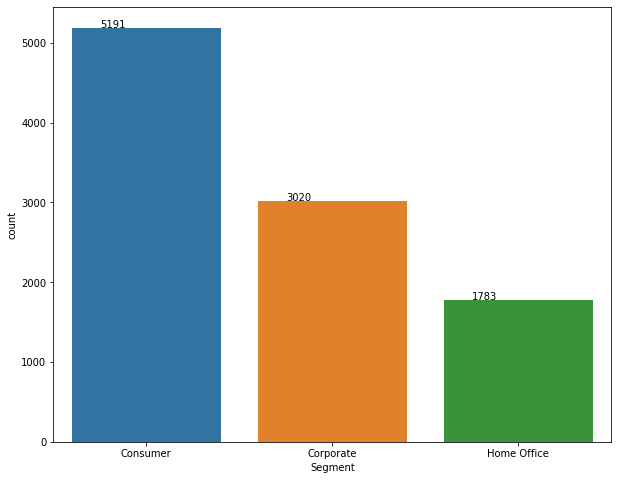

In [ ]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

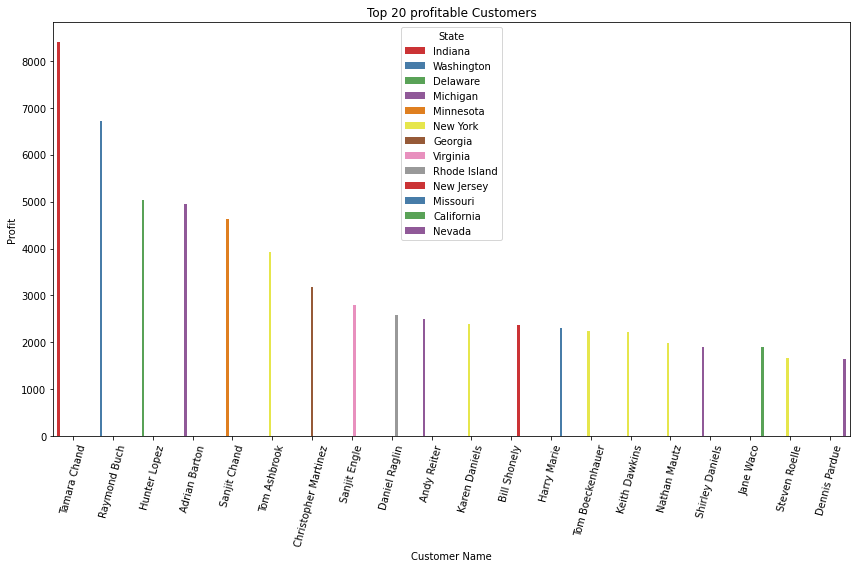

In [ ]:
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()


In [ ]:
df['Order ID'].nunique()

5009

In [ ]:
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Shipment Duration, Length: 9994, dtype: int64

In [ ]:
df.iloc[:,[0,3,21]]

,Order ID,Ship Mode,Shipment Duration
0,CA-2016-152156,Second Class,3
1,CA-2016-152156,Second Class,3
2,CA-2016-138688,Second Class,4
3,US-2015-108966,Standard Class,7
4,US-2015-108966,Standard Class,7
...,...,...,...
9989,CA-2014-110422,Second Class,2
9990,CA-2017-121258,Standard Class,5
9991,CA-2017-121258,Standard Class,5
9992,CA-2017-121258,Standard Class,5


In [ ]:
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [ ]:
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg


,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2014-03-31,2017-06-29,"[Belkin 325VA UPS Surge Protector, 6', Avery B...","[Minneapolis, San Francisco, Round Rock, New Y..."
AA-10375,15,1056.390,52.349415,2014-04-21,2017-12-11,"[Sterilite Officeware Hinged File Box, Colored...","[Mesa, Omaha, Los Angeles, Salem, Atlanta, Ran..."
AA-10480,12,1790.512,55.580242,2014-05-04,2017-04-15,"[Xerox 1967, DAX Wood Document Frame, Strathmo...","[Concord, Middletown, Springfield, Detroit]"
AA-10645,18,5086.935,42.364755,2014-06-22,2017-11-05,"[Padded Folding Chairs, Black, 4/Carton, Panas...","[Chester, San Francisco, Georgetown, San Diego..."
AB-10015,6,886.156,15.186975,2014-02-18,2016-11-10,"[Global Push Button Manager's Chair, Indigo, N...","[Seattle, Arlington, Oklahoma City]"
...,...,...,...,...,...,...,...
XP-21865,28,2374.658,53.799227,2014-01-20,2017-11-17,[Imation USB 2.0 Swivel Flash Drive USB flash ...,"[San Diego, Everett, Chicago, Los Angeles, Pas..."
YC-21895,8,5454.350,42.235317,2014-11-17,2017-12-26,[Hewlett Packard 610 Color Digital Copier / Pr...,"[San Francisco, Los Angeles, Newark, Dallas, F..."
YS-21880,12,6720.444,37.278442,2015-01-12,2017-12-21,"[4009 Highlighters by Sanford, Letter Size Car...","[Burlington, Oakland, Newark, Seattle, Columbu..."


In [ ]:
df['order year']=df['Order Date'].dt.year
df['order year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order year, dtype: int64

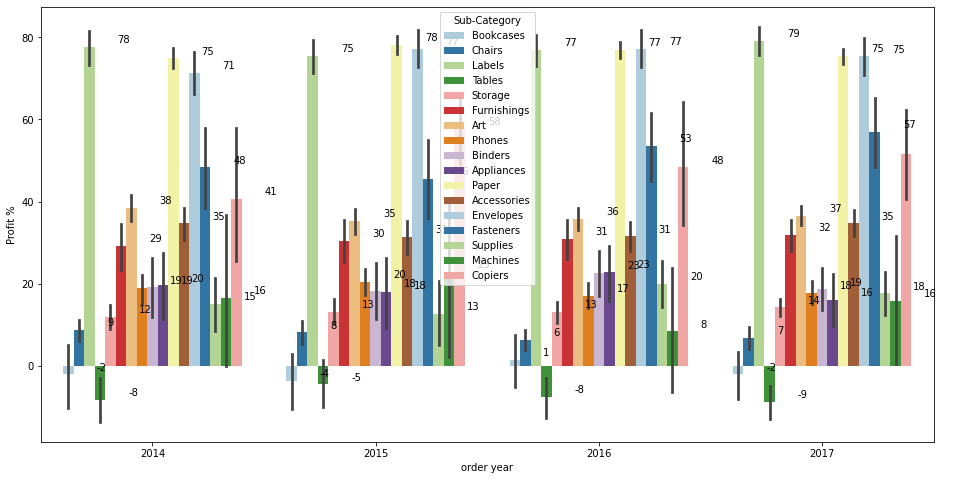

In [ ]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order year','Profit %',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()


Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

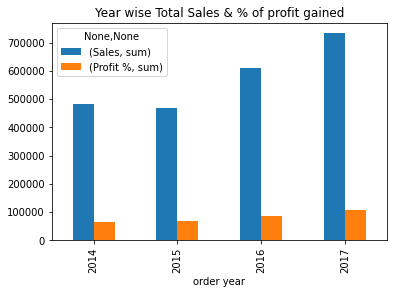

In [ ]:
df.groupby('order year')['Sales','Profit %'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')